Specifying individual cell / synaptic definitions

Code should be run in a FBL Medulla kernel

In [13]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import networkx
import numpy as np
import os.path
from random import choice
import tempfile
import typing as tp
import flybrainlab as fbl

import linecache
import os
import tracemalloc

import netpyne
from netpyne.specs import netParams, SimConfig
from netpyne import conversion, sim

from brian2 import *

import src.NeuroNLP_to_Brian_Netpyne.nlpToNetpyne as toNet
import src.NeuroNLP_to_Brian_Netpyne.nlptoBrian2 as toBri

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Define variables and helper functions

In [14]:
# Query and files
query = "show cholinergic neurons presynaptic to T4a neuron in column C with at least 5 synapses"
path = "img/custom_definitions/"

# Cells Present: Mi1-C, Mi1-L, Tm3-C-ant, Tm3-K-ant, Tm3-home-post

## NetPyNE

In [15]:
# Default Mechanisms
stim_mech = {'bkg': {'type': 'NetStim', 'rate': 10, 'noise': 0}} # Stimulation mechanism
default_syn = {'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 5.0, 'e': 0} # Excitatory synapse mechanism

default_cell = {'secs': {}}
default_cell['secs']['soma'] = {'geom': {}, 'mechs': {}}
default_cell['secs']['soma']['geom'] = {'diam': 18.8, 'L': 18.8, 'Ra': 123.0}                           # soma geometry
default_cell['secs']['soma']['mechs']['hh'] = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}  # soma hh mechanism

Custom Cells

In [16]:
# Custom Cell Definition (Izhikevich 2007)
# See the "import_model" example for instructions on importing cell models
custom_cell = {'secs': {}}
custom_cell['secs']['soma'] = {'geom': {}, 'pointps': {}}
custom_cell['secs']['soma']['geom'] = {'diam': 18.8, 'L': 18.8, 'Ra': 123.0}
custom_cell['secs']['soma']['pointps']['Izhi'] = {'mod':'Izhi2007b',
                                                  'C':1,
                                                  'k':0.7,
                                                  'vr':-60,
                                                  'vt':-40,
                                                  'vpeak':35,
                                                  'a':0.03,
                                                  'b':-2,
                                                  'c':-50,
                                                  'd':100,
                                                  'celltype':1}

[FBL NLP 2023-08-18 11:34:44,551] NLP successfully parsed query.

Start time:  2023-08-18 11:34:48.856406

Creating network of 5 cell populations on 1 hosts...
  Number of cells on node 0: 5 
  Done; cell creation time = 0.00 s.
Making connections...
  Number of connections on node 0: 12 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 1 
  Done; cell stims creation time = 0.00 s.
Recording 3 traces of 1 types on node 0

Running simulation using NEURON for 1000.0 ms...
  Done; run time = 0.07 s; real-time ratio: 14.37.

Gathering data...
  Done; gather time = 0.00 s.

Analyzing...
  Cells: 5
  Connections: 13 (2.60 per cell)
  Spikes: 672 (134.40 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 0.07 s
Preparing spike data...
Plotting raster...
Plotting recorded cell traces ... cell


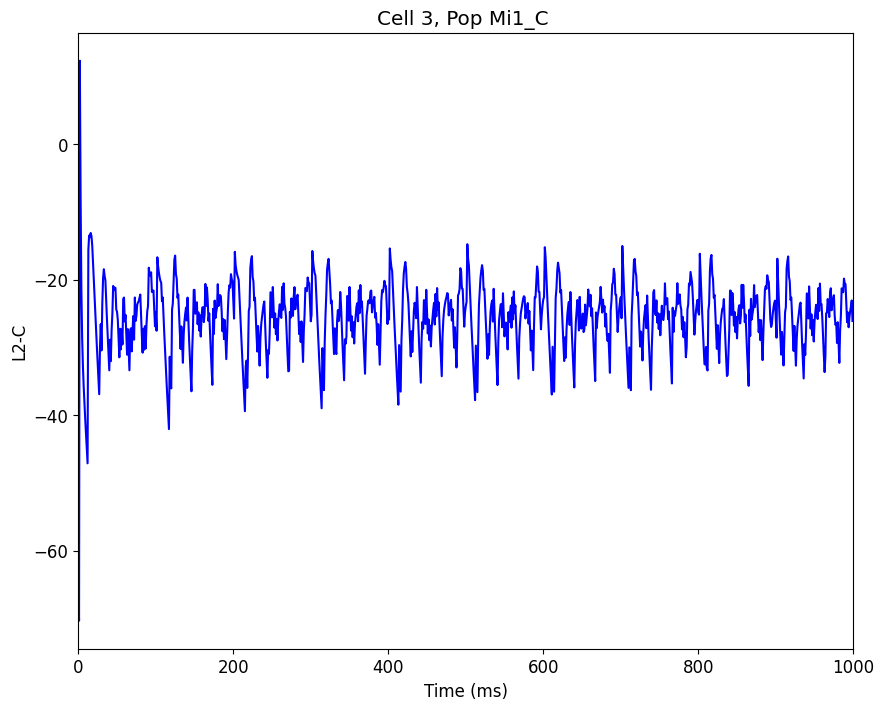

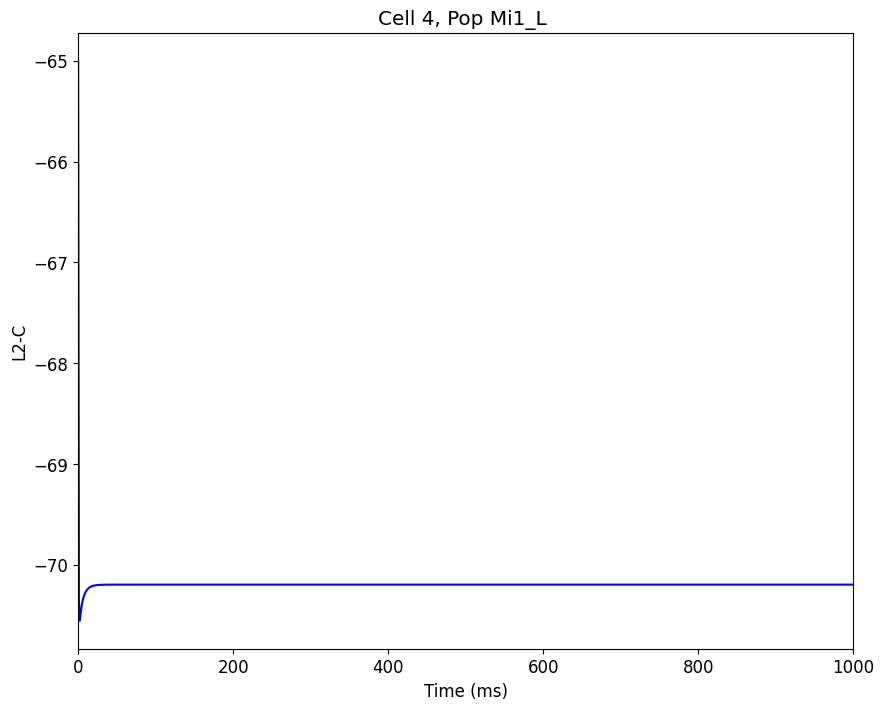

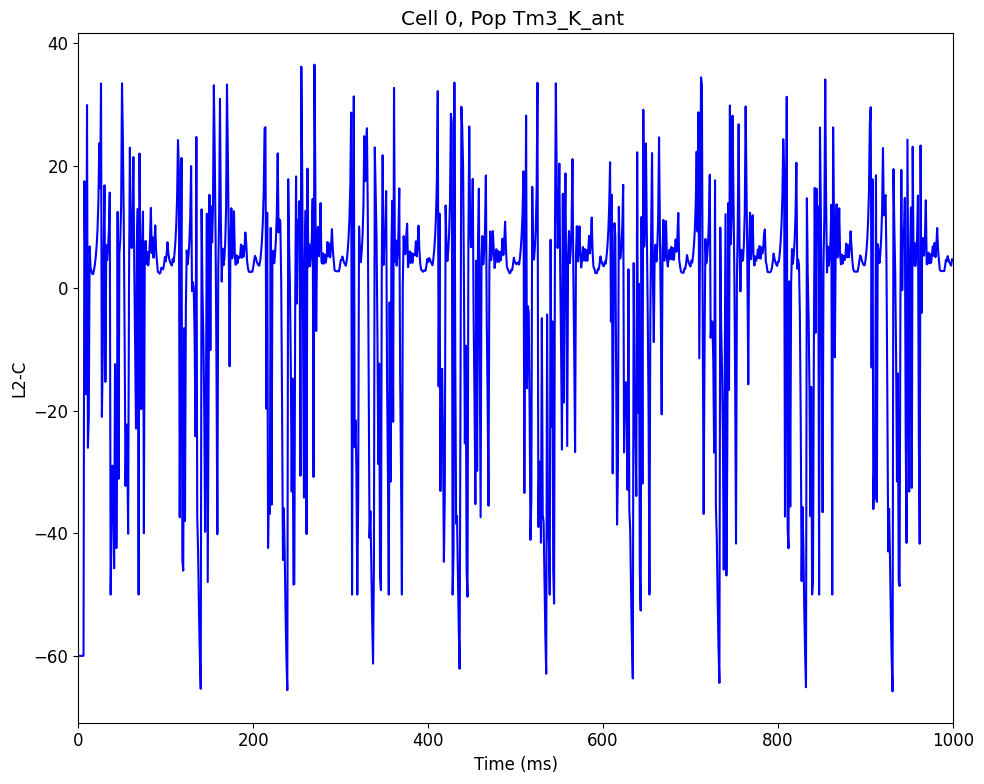

Plotting 2D representation of network cell locations and connections...


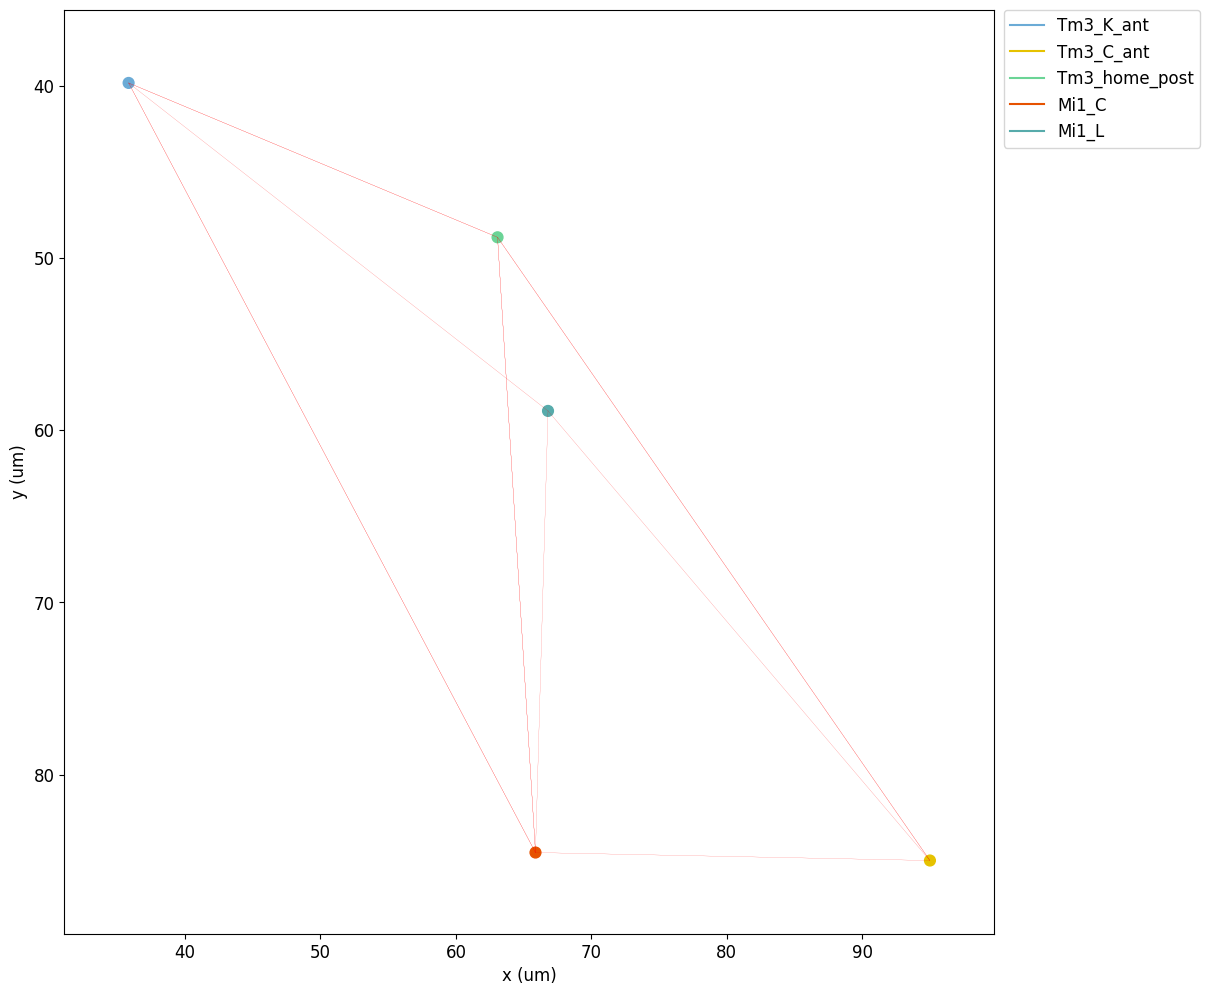

Plotting connectivity matrix...


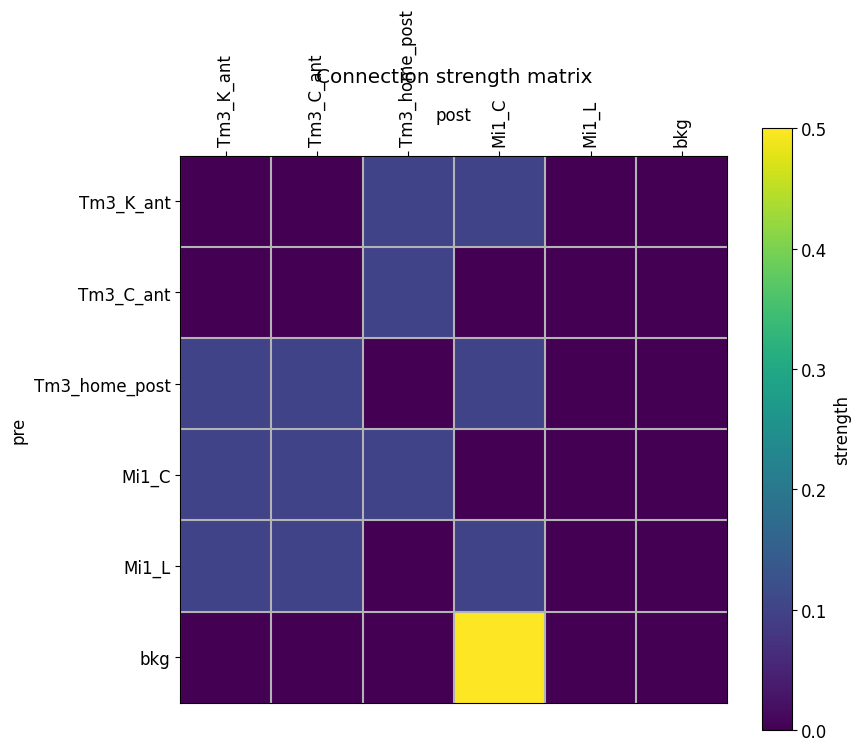

  Done; plotting time = 1.54 s

Total time = 1.62 s


In [17]:
my_client = fbl.get_client()
res = my_client.executeNLPquery(query)

# Default cell is basic NEURON hh neuron, Tm3-K-ant and Tm3-home-post are defined as Izhikevich neurons (2007 version)
networkParameters, simConfig = toNet.model_gen(client=my_client,
                                               res=res,
                                               filename=path+"Custom_Def_Cell",
                                               custom_cells={'Tm3-K-ant': custom_cell, 'Tm3-home-post': custom_cell},
                                               default_mech=default_syn,
                                               default_cell=default_cell,
                                               stim_sources=stim_mech,
                                               stim_targets={'Mi1_C': {'source': 'bkg', 'weight': 0.5, 'delay': 1, 'mech': 'exc'}},
                                               record_names=['Mi1_C', 'Mi1_L', 'Tm3_K_ant'],
                                               maintain_morphology=False)

toNet.simulate(networkParameters, simConfig)

Custom Synapses

In [18]:
# Custom Synapse Definition
custom_syn = {'mod': 'Exp2Syn', 'tau1': 0.6, 'tau2': 8.5, 'e': -75}

[FBL NLP 2023-08-18 11:59:41,168] NLP successfully parsed query.

Start time:  2023-08-18 11:59:46.383198

Creating network of 5 cell populations on 1 hosts...
  Number of cells on node 0: 5 
  Done; cell creation time = 0.00 s.
Making connections...
  Number of connections on node 0: 12 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 1 
  Done; cell stims creation time = 0.00 s.
Recording 3 traces of 1 types on node 0

Running simulation using NEURON for 1000.0 ms...
  Done; run time = 0.04 s; real-time ratio: 23.04.

Gathering data...
  Done; gather time = 0.00 s.

Analyzing...
  Cells: 5
  Connections: 13 (2.60 per cell)
  Spikes: 40 (8.00 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 0.04 s
Preparing spike data...
Plotting raster...
Plotting recorded cell traces ... cell


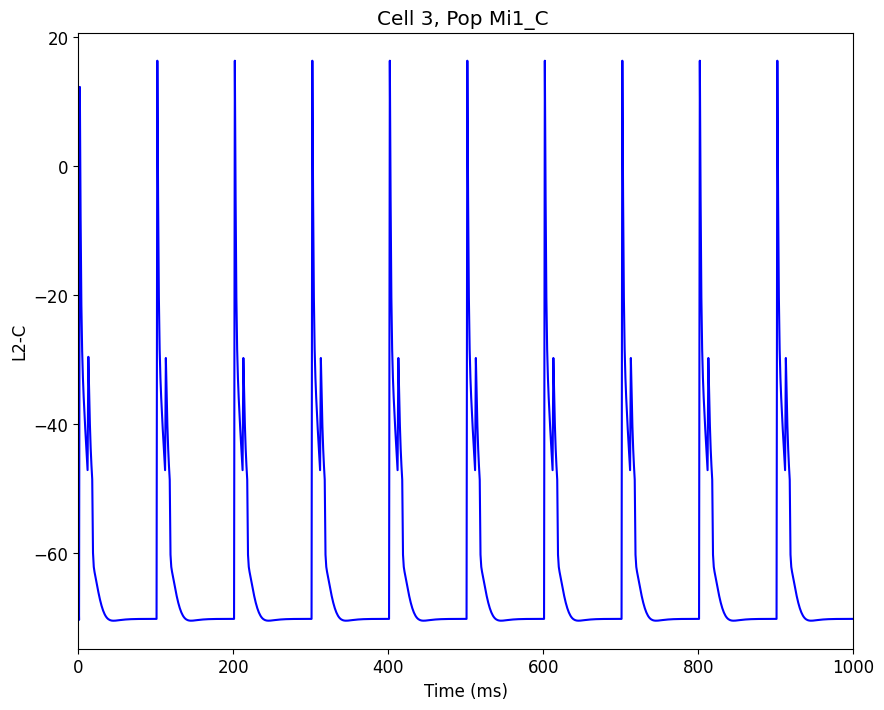

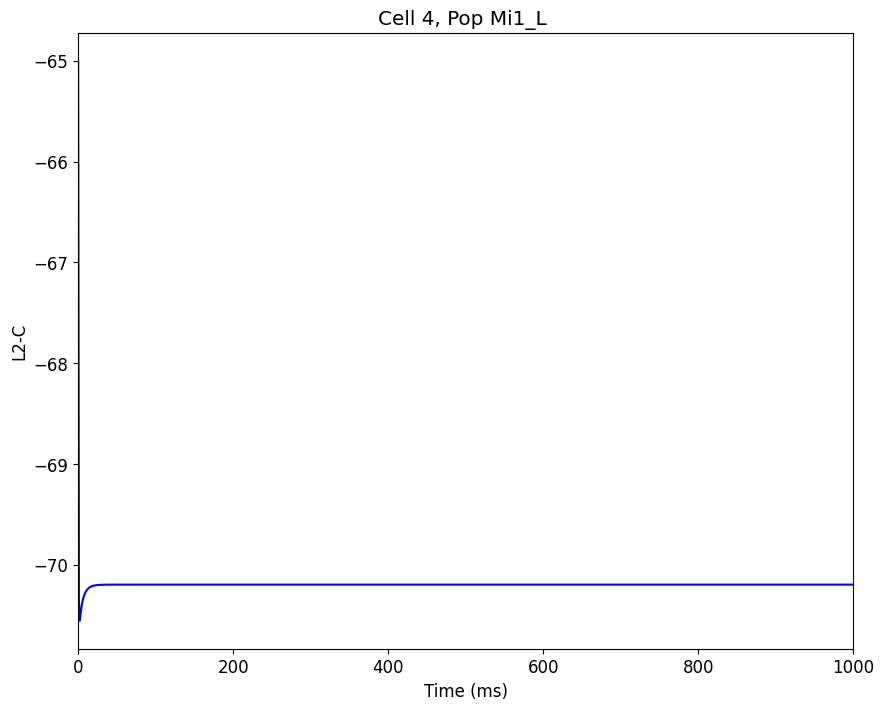

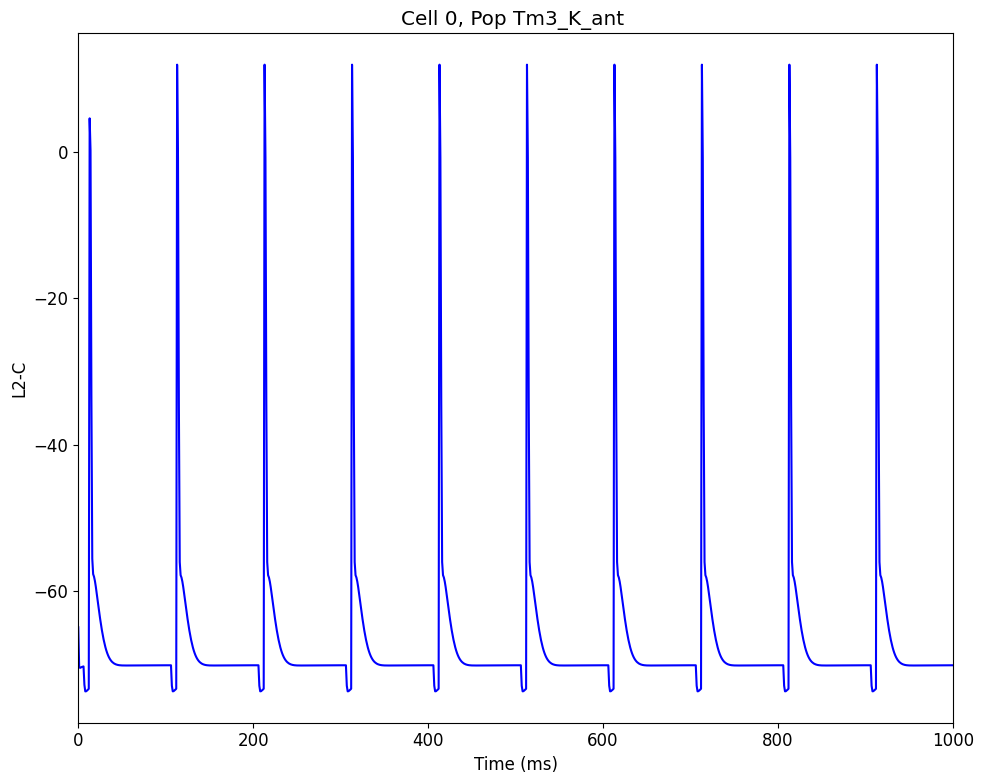

Plotting 2D representation of network cell locations and connections...


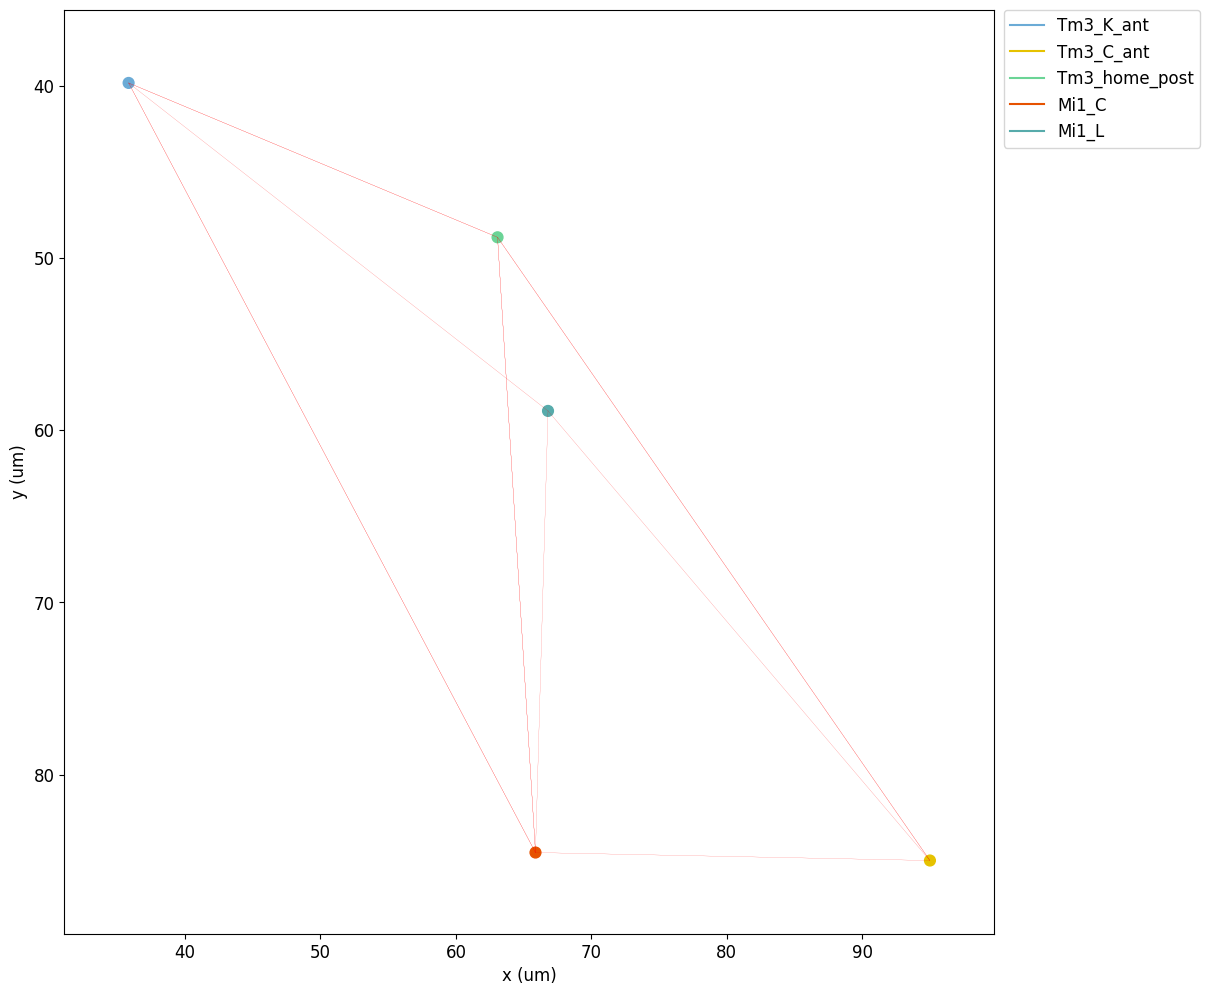

Plotting connectivity matrix...


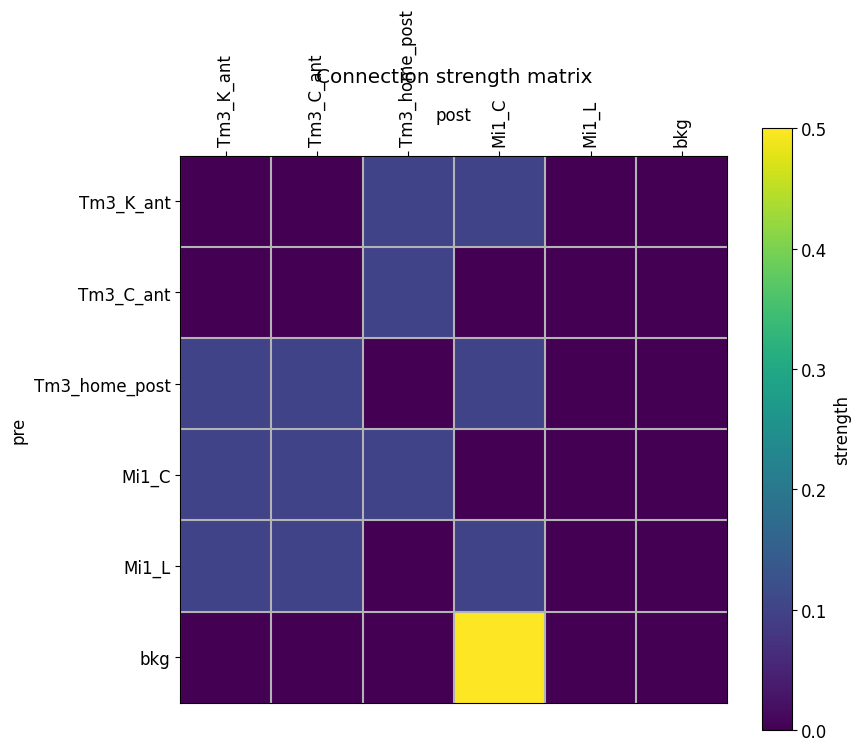

  Done; plotting time = 1.51 s

Total time = 1.56 s
[twisted 2023-08-18 14:24:08,019] dropping connection to peer tcp4:128.59.65.19:443 with abort=True: WebSocket ping timeout (peer did not respond with pong in time)
[twisted 2023-08-18 14:24:08,048] session closed with reason wamp.close.transport_lost [()]


In [19]:
my_client = fbl.get_client()
res = my_client.executeNLPquery(query)

# Default cell is basic NEURON hh neuron, Tm3-K-ant and Tm3-home-post are defined as Izhikevich neurons (2007 version)
networkParameters, simConfig = toNet.model_gen(client=my_client,
                                               res=res,
                                               filename=path+"Custom_Def_Syn",
                                               custom_mechs={'Mi1-C--Tm3-K-ant': custom_syn,
                                                             'Mi1-L--Mi1-C': custom_syn,
                                                             'Tm3-K-ant--Mi1-C': custom_syn},
                                               default_mech=default_syn,
                                               default_cell=default_cell,
                                               stim_sources=stim_mech,
                                               stim_targets={'Mi1_C': {'source': 'bkg', 'weight': 0.5, 'delay': 1, 'mech': 'exc'}},
                                               record_names=['Mi1_C', 'Mi1_L', 'Tm3_K_ant'],
                                               maintain_morphology=False)

toNet.simulate(networkParameters, simConfig)

## Brian2

In [14]:
# Default Mechanisms
cell_vars = {'tau': 10*ms,
             'v0': 0.02*mV}

default_cell = {'model': 'dv/dt = -v/tau : volt',
                'threshold': 'v > -50*mV',
                'reset': 'v = -70*mV',
                'method':'exponential_euler'}
default_mech = {'on_pre': 'v += 10*mV'}
stim_dict = {'model': 'rates = 10*Hz : Hz', 'threshold': 'rand()<rates*dt'}

Custom Cells

In [15]:
# Custom Cell Definition
custom_cell = {'model': 'dv/dt = (v0 - v) / tau : volt (unless refractory)',
               'threshold': 'v > 10*mV',
               'reset': 'v = 0*mV',
               'refractory': 5*ms,
               'method': 'exact'}

[FBL NLP 2023-08-17 14:40:01,291] NLP successfully parsed query.


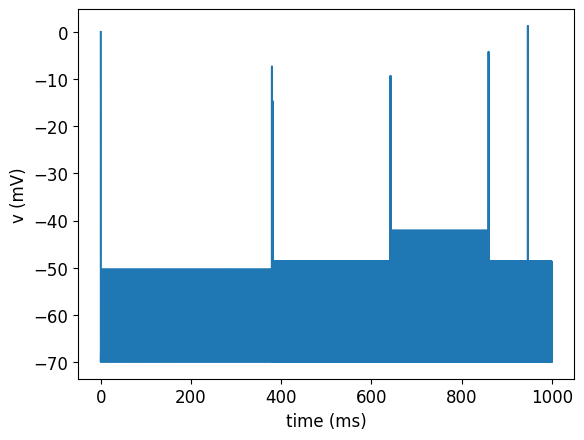

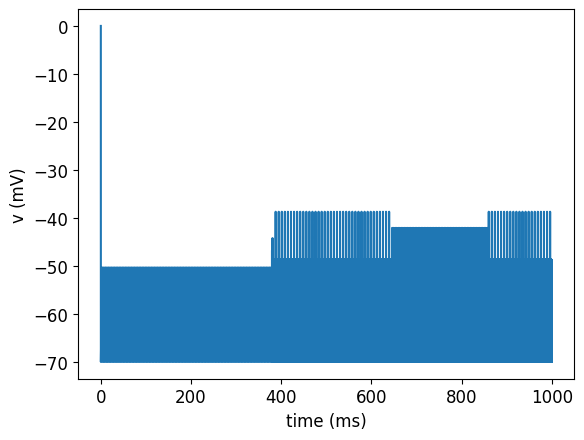

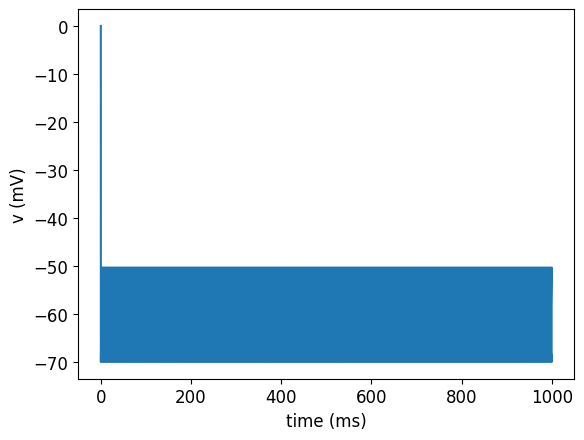

In [21]:
my_client = fbl.get_client()
res = my_client.executeNLPquery(query)

networkParameters = toBri.model_gen(client=my_client,
                                    res=res,
                                    custom_cells={'Tm3_K_ant': custom_cell, 'Tm3_home_post': custom_cell},
                                    stim_sources={'bkg': stim_dict},
                                    stim_targets={'bkg': 'Mi1_C'},
                                    default_mech=default_mech,
                                    default_cell=default_cell,
                                    record_names=['Mi1-C', 'Mi1-L', 'Tm3-K-ant'],
                                    maintain_morphology=False,
                                    **cell_vars)

toBri.simulate(networkParameters, 1000, cell_vars)

Custom Synapses

In [22]:
# Custom Synapse Definition

custom_mech = {'on_pre': 'v += 2*mV'}

[FBL NLP 2023-08-17 14:40:58,163] NLP successfully parsed query.


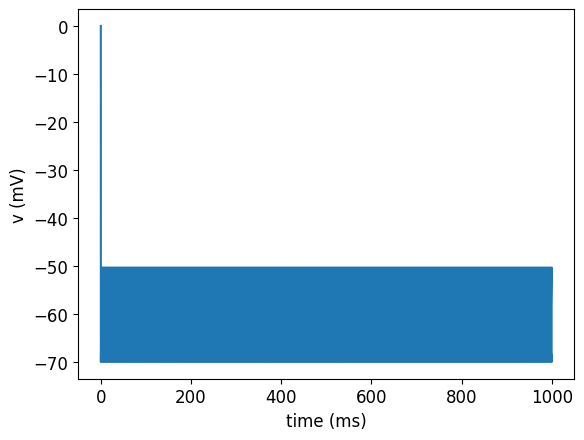

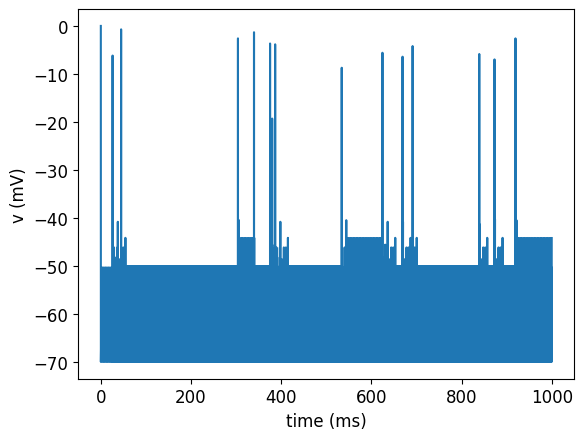

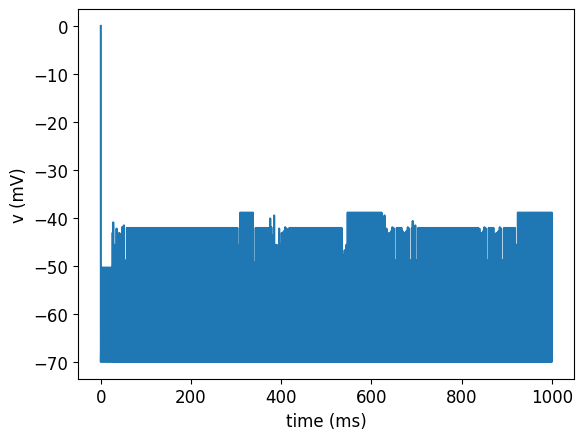

[twisted 2023-08-17 16:57:21,810] dropping connection to peer tcp4:128.59.65.19:443 with abort=True: WebSocket ping timeout (peer did not respond with pong in time)
[twisted 2023-08-17 16:57:21,817] session closed with reason wamp.close.transport_lost [()]


In [24]:
my_client = fbl.get_client()
res = my_client.executeNLPquery(query)

networkParameters = toBri.model_gen(client=my_client,
                                    res=res,
                                    custom_mechs={'Mi1-C--Tm3-K-ant': custom_mech,
                                                  'Mi1-L--Mi1-C': custom_mech,
                                                  'Tm3-K-ant--Mi1-C': custom_mech},
                                    stim_sources={'bkg': stim_dict},
                                    stim_targets={'bkg': 'Mi1_C'},
                                    default_mech=default_mech,
                                    default_cell=default_cell,
                                    record_names=['Mi1-C', 'Mi1-L', 'Tm3-K-ant'],
                                    maintain_morphology=False,
                                    **cell_vars)

toBri.simulate(networkParameters, 1000, cell_vars)